In [36]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [37]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

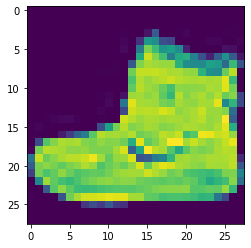

In [38]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
plt.imshow(imagens_treino[0])

In [39]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

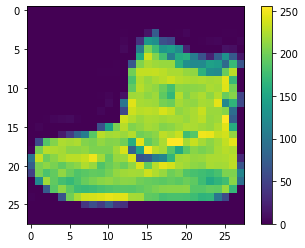

In [40]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

In [41]:
imagens_treino = imagens_treino/float(255)

In [42]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 2s 13ms/step - loss: 0.9626 - accuracy: 0.6616 - val_loss: 0.4607 - val_accuracy: 0.8363
Epoch 2/5
100/100 [==============================] - 1s 10ms/step - loss: 0.4646 - accuracy: 0.8387 - val_loss: 0.4065 - val_accuracy: 0.8577
Epoch 3/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3990 - accuracy: 0.8587 - val_loss: 0.3775 - val_accuracy: 0.8636
Epoch 4/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3671 - accuracy: 0.8698 - val_loss: 0.3596 - val_accuracy: 0.8741
Epoch 5/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3477 - accuracy: 0.8724 - val_loss: 0.3469 - val_accuracy: 0.8760


In [43]:
sumario_do_modelo = modelo.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [44]:

pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.01695699,  0.03764842,  0.05636968, ..., -0.047059  ,
         0.0705872 , -0.05648704],
       [ 0.02024822,  0.04542803,  0.00111013, ..., -0.00195965,
         0.06555356, -0.11051635],
       [-0.01311516,  0.0537962 ,  0.11231343, ..., -0.1342289 ,
        -0.02587794, -0.01059378],
       ...,
       [-0.00960844,  0.08129274,  0.01256353, ..., -0.08479583,
        -0.08852191,  0.05160288],
       [ 0.0219935 ,  0.0936275 ,  0.02622479, ..., -0.10950109,
        -0.15446313, -0.00063385],
       [ 0.06972373,  0.03082039, -0.00218671, ...,  0.05564493,
        -0.14569   , -0.05262976]], dtype=float32)

In [45]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.01499503, 0.6826495 , 0.5473547 , ..., 0.5325045 , 0.1853444 ,
         0.25181302],
        [0.07399847, 0.6615446 , 0.72925687, ..., 0.5235453 , 0.73081106,
         0.318128  ],
        [0.84788144, 0.10982467, 0.2708756 , ..., 0.45319727, 0.510654  ,
         0.37292904],
        ...,
        [0.07229425, 0.749753  , 0.04599692, ..., 0.20014666, 0.28216746,
         0.9740557 ],
        [0.13322762, 0.03269827, 0.19848731, ..., 0.80601984, 0.24606462,
         0.42013875],
        [0.10201745, 0.07635272, 0.91002846, ..., 0.5624879 , 0.82310444,
         0.8085948 ]], dtype=float32),
 array([ 0.19818375, -0.00559823, -0.09813966, -0.21601622, -0.07214584,
        -0.27430445,  0.2537467 ,  0.23377293,  0.24712326, -0.20516077,
         0.2249817 ,  0.16634771, -0.05790642,  0.15405937, -0.00404959,
         0.04929397,  0.09364319, -0.04166389, -0.01136975,  0.5309885 ,
         0.2048036 , -0.10778983,  0.35759282, -0.02045229, -0.10372774,
         0.30271313,  0.20964

In [46]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 120.7729 - accuracy: 0.2894 - val_loss: 13.9453 - val_accuracy: 0.6804
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 22.8821 - accuracy: 0.6033 - val_loss: 4.6565 - val_accuracy: 0.7789
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 9.3181 - accuracy: 0.6705 - val_loss: 4.0080 - val_accuracy: 0.7218
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 4.5139 - accuracy: 0.7015 - val_loss: 2.3248 - val_accuracy: 0.7632
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.4950 - accuracy: 0.7298 - val_loss: 1.1563 - val_accuracy: 0.8063


In [47]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

KeyError: ignored

In [ ]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [ ]:
modelo.get_config()

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [ ]:

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [ ]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

In [ ]:

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)